# Are all planetary systems similar?

*Author: Ema Donev, 2022*

In this research paper, I explore the nature of planetary systems outside of our solar system. By accessing the data from NASA's exoplanet archive, specifically the Planetary Systems Composite Data table, I was able to create planetary systems grouped by the same star, categorize exoplanets and statistically analyze these systems.

## Setup

In [1]:
# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

In [2]:
# CONFIGURATION
# -------------
sns.set_theme(style='white') # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
clr = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
clrs = sns.set_palette(sns.color_palette(clr))

# configuring fonts for plotting
font = FontProperties()
font.set_family('serif')
font.set_name('Andale Mono')
font.set_style('normal')

%matplotlib inline 

# What are exoplanets?

> Exoplanets are planets that orbit stars other than our Sun. 

We have found exoplanets that orbit all sorts of stars, from red dwarfs, giants, pulsars, and even neutron stars. According to current statistics, it is said that every star in our galaxy has at least one planet, and for some stars, we have found entire planetary systems! In this research paper, I wanted to explore the variability of different planetary systems. 

> *What can we find out about exoplanets?*

An exoplanet's distance, the orbital period, eccentricity, radius or mass depending on the detection method used. By using the mass and radius of an exoplanet, we can calculate its density and approximately determine its composition. Using the distance of the exoplanet and the temperature of its star, we can estimate the average temperature of the exoplanet, though this depends on the internal structure of the exoplanet, whether it has an atmosphere, and what its atmosphere is composed of, if it exists. Finally, we can determine whether the exoplanet is habitable, using the habitable zone and other parameters of the exoplanet!

So, even with limited methods, we can discover so much about an exoplanet! 

We can find exoplanets using 4 methods: **the transit method, radial velocity method, gravitational microlensing or we can photograph them directly**. The 2 most popular are the transit and radial velocity methods, as they give the most information about an exoplanet.

In the following section we use the provided data from NASA's exoplanet archive to analyze the properties of exoplanets mentioned above.

## Data

The data has been previously downloaded from the NASA exoplanet archive and stored locally in `exoplanets.csv`.

In [3]:
exo_data = pd.read_csv('../DATA/exoplanets.csv')

In [4]:
# checking the table
print(exo_data.shape)
exo_data.head()

(4940, 14)


,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.6000,19.10,0.231,4742.0,2.70,-0.35,93.1846
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.8142,13.80,0.080,4213.0,2.78,-0.02,125.3210
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.5000,3.90,0.000,4813.0,2.20,-0.24,75.4392
3,14 Her b,14 Her,1,2,1773.40002,2.93,12.9,1481.0878,3.79,0.370,5338.0,0.90,0.41,17.9323
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.7374,1.26,0.680,5750.0,1.08,0.06,21.1397


### Statistical analysis

In [5]:
def annotate_countplot(sp, df: pd.DataFrame(), perc_height:float, font_size:int=10):
    for p in sp.patches:
        height = p.get_height()
    
        sp.text(p.get_x() + p.get_width()/2., 
                height + len(df) * perc_height, height,
                ha = 'center', fontsize = font_size)

In [6]:
plt.rcParams.update({
    'font.serif': 'Andale Mono',
    'font.family': 'serif'
})

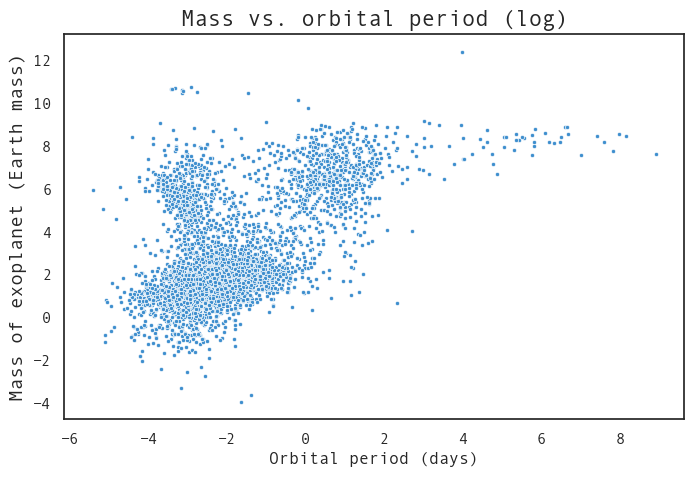

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_bmasse']), marker='.', color=b2)
plt.title('Mass vs. orbital period (log)', fontproperties=font, fontsize=16)
plt.xlabel('Orbital period (days)',fontproperties=font, fontsize=12)
plt.ylabel('Mass of exoplanet (Earth mass)',fontproperties=font, fontsize=14)
plt.savefig('../img/mass_orb_period.png', dpi=300)
plt.show()

The mass of an exoplanet can be calculated using the radial velocity method. By plotting a graph that compares the distance of the exoplanet and its mass, we find something interesting.

There are 3 distinct groups in the graph, which we recognize as **different categories of exoplanets!**

Group A, the upper left side, consists of very massive planets that are located very close to their stars. This type of planet is called a **hot Jupiter**, as they are close to their stars and have a mass that is approximately equal to or greater than that of Jupiter. 

Group B, upper right side, consists of planets with large masses, but which are farther away from their stars. These planets are **gas giants**, similar to Jupiter and Saturn. 

Group C consists of planets that have masses smaller than Jupiter, down to masses similar to Earth. In this group, we find **terrestrial exoplanets, planets similar to or smaller than Earth**. There include super-Earths, which are 2-3 times larger than Earth. Also, we have planets similar to Neptune, which are comparable to Neptune in size and mass. 

These four classifications of exoplanets will be used throughout the entire work.

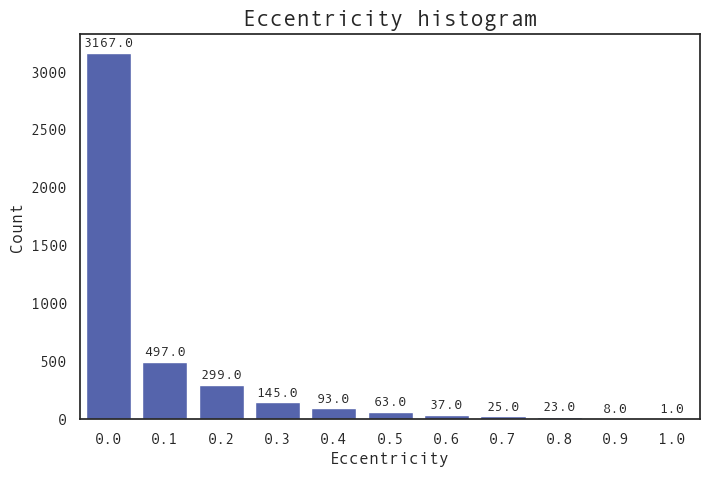

In [8]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=round(exo_data['pl_orbeccen'],1),color=b1,data = exo_data)
annotate_countplot(scp,exo_data,0.01)
plt.xlabel('Eccentricity', fontproperties=font, fontsize=12)
plt.ylabel('Count', fontproperties=font, fontsize=12)
plt.title('Eccentricity histogram', fontproperties=font, fontsize=16)
plt.savefig('../img/ecc_hist.png', dpi=300)
plt.show()

*Eccentricity* is a value from 0 to 1 that tells us how elliptical a planet’s orbit is. The closer the value is to zero, the more circular the orbit, and the closer it is to 1, the more elliptical it is. 

We can see that most planets have an eccentricity close to or equal to 0, which is expected since all the planets in our solar system have very low eccentricities. However, we can observe that there is a significant number of exoplanets with an eccentricity greater than 0, which is quite interesting!

---

### Kepler's third law

In [9]:
ht = exo_data[exo_data['pl_orbper']<1000].copy()
ht.head()

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.60000,19.10,0.231,4742.0,2.70,-0.35,93.1846
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.81420,13.80,0.080,4213.0,2.78,-0.02,125.3210
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.50000,3.90,0.000,4813.0,2.20,-0.24,75.4392
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.73740,1.26,0.680,5750.0,1.08,0.06,21.1397
5,17 Sco b,17 Sco,1,1,578.38000,1.45,12.9,1373.01872,3.51,0.060,4157.0,1.22,-0.01,124.9530


In [10]:
ht['a'] = ht['pl_orbsmax']**3
ht['P']= ((ht['pl_orbper']/365)**2) * ht['st_mass']
ht[ht['P']>25]

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist,a,P
829,HD 240237 b,HD 240237,1,1,745.70001,1.92,12.2,5050.3187,15.3,0.4,3926.0,8.76,-0.25,933.377,7.077888,36.563409
1058,HD 96127 b,HD 96127,1,1,647.29999,1.42,12.1,6661.7168,20.7,0.3,3943.0,10.94,-0.24,587.659,2.863288,34.406682


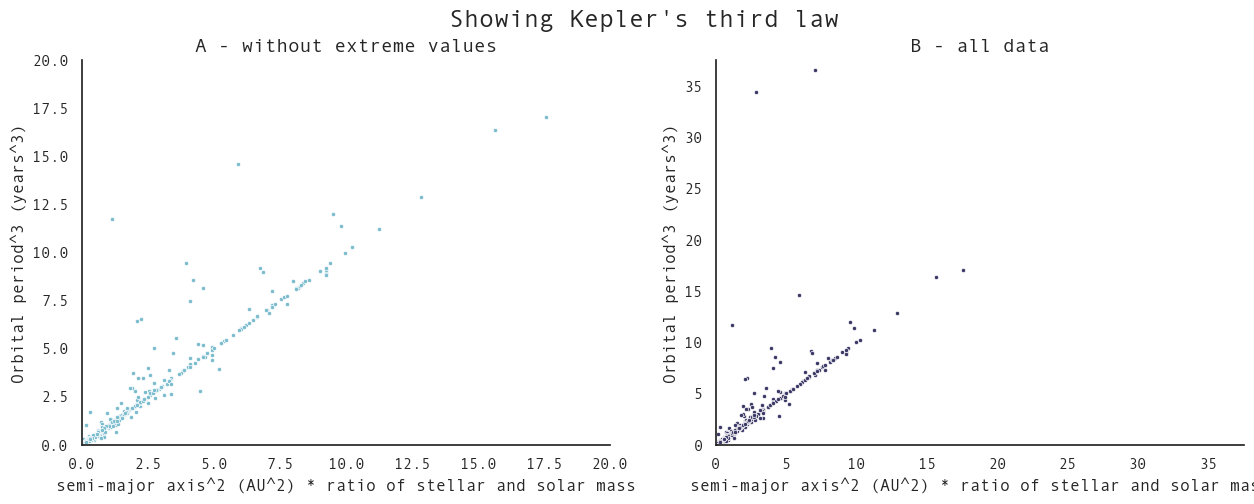

In [11]:
_,_ = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Showing Kepler's third law", fontproperties=font, fontsize=18)
a = ht['pl_orbsmax']**3
P = ((ht['pl_orbper']/365)**2) * ht['st_mass']
plt.subplot(1,2,1)
sns.scatterplot(x=a, y=P, color=b3, marker='.')
sns.despine()
plt.xlim(0,20)
plt.ylim(0,20)
plt.title('A - without extreme values', fontproperties=font, fontsize=14)
plt.xlabel('semi-major axis^2 (AU^2) * ratio of stellar and solar mass', fontproperties=font, fontsize=12)
plt.ylabel('Orbital period^3 (years^3)', fontproperties=font, fontsize=12)

plt.subplot(1,2,2)
sns.scatterplot(x=a, y=P, color=b4, marker='.')
sns.despine()
plt.title('B - all data', fontproperties=font, fontsize=14)
plt.xlim(0,(np.max(P)+1))
plt.ylim(0,(np.max(P)+1))
plt.xlabel('semi-major axis^2 (AU^2) * ratio of stellar and solar mass', fontproperties=font, fontsize=12)
plt.ylabel('Orbital period^3 (years^3)', fontproperties=font, fontsize=12)

plt.savefig('../img/keplers_3rd.png', dpi=300)

plt.show()

The orbital period of a planet is the time it takes for the planet to complete one orbit around its star. The distance depends on the planet's orbital period. As we know from Kepler's third law, which states: $P^2 = a^3$, where $P$ is the orbital period and $a$ is the semi-major axis. However, this equation only applies to the planets in our solar system. To make the equation valid for planets in other planetary systems, we need to account for the mass of the star. The modified equation is: $$a^3 = P^2 \frac{M_{star}}{M_s}$$, where $M_{star}$ is the mass of the star, an $M_s$ is the solar mass.

From the 2 graphs above, we can verify Kepler's law. The reason for 2 graphs is because graph B contains 2 outliers in the data, the values are really extreme and then they mess up the underlying law.

---

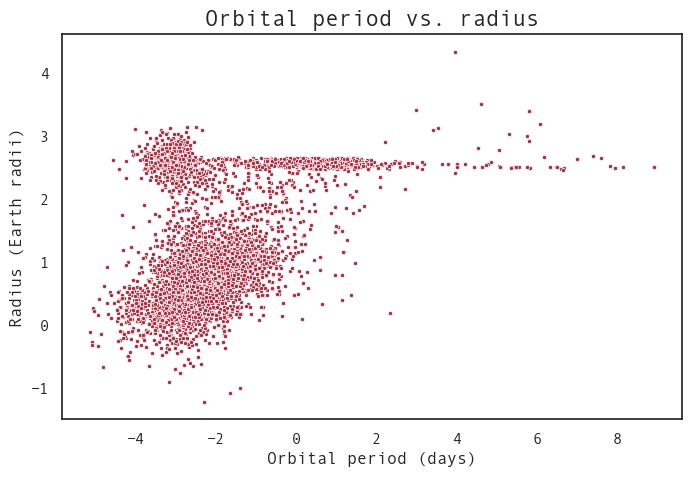

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_rade']), marker='.', color=or1)
plt.title('Orbital period vs. radius', fontproperties=font, fontsize=16)
plt.xlabel('Orbital period (days)',fontproperties=font, fontsize=12)
plt.ylabel('Radius (Earth radii)', fontproperties=font, fontsize=12)
plt.savefig('../img/t_vs_r.png', dpi=300)
plt.show()

We can calculate the radius of an exoplanet using the transit method. By plotting a graph that compares the distance of an exoplanet to its radius, we can confirm the assumptions seen in the previous graph. Once again, we have three distinct groups, but we observe that the groups are more separated, and that the exoplanets in the group of gas giants all have nearly identical radii, though they are located at different distances.

# Next...

In the following notebook, we will categorize our exoplanets into specific types, such as Hot Jupiters, Super Earths, and more!